In [16]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

In [17]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [18]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


<AxesSubplot:>

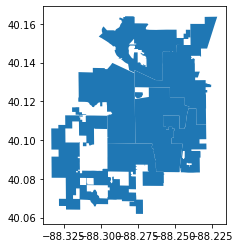

In [19]:
gdf_councils.plot()

In [20]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
gdf_councils = gdf_councils.to_crs(epsg=3857)

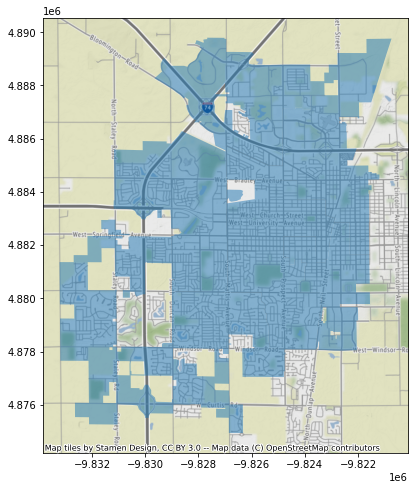

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5)

ctx.add_basemap(ax=ax)

plt.show()

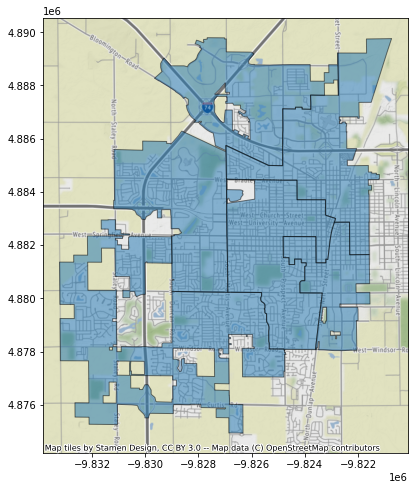

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In [36]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

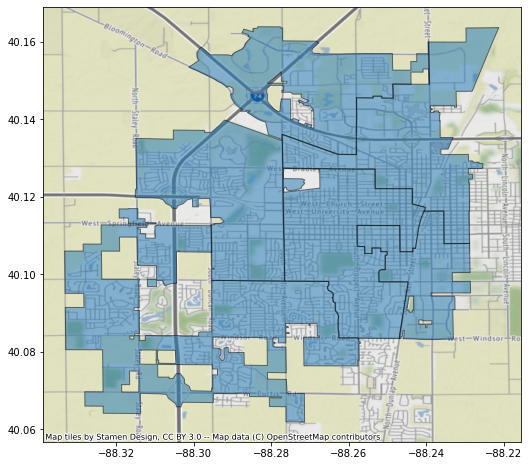

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
# here, you might get an error and can try:
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [38]:
gdf_tra = geopandas.read_file('https://opendata.arcgis.com/datasets/87e2401693b74a12b5396b5cba9573a1_35.geojson')

In [39]:
gdf_tra.head()

,OBJECTID,Intersecti,UPS,Coord_Type,CNTRL_Seri,CNTRL_Mode,Number_of_,Detection_,Interconne,Percent_St,...,LegacyID,FACILITYID,Ownership,OwnershipPercent,LED_Installed_Year,Controller_ID,Notes,RepairYear,FieldVerifiedDate,geometry
0,41,RANDOLPH//UNIVERSITY,N,TBC,,3608M10,N,NONE,,0,...,None,41,Champaign,NaN,2017,None,None,None,None,POINT (-88.24515 40.11629)
1,107,Moreland/Towncenter,None,None,None,None,None,Video,None,None,...,None,10B6A6EB-F428-4810-8C99-F40D838B1828,None,NaN,2012,None,None,None,None,POINT (-88.25062 40.14203)
2,108,Mattis/Curtis,None,None,None,None,None,,None,None,...,None,9AB971C5-7EFD-4CB3-9B7F-9561976FEAF3,Champaign,NaN,2009,None,None,None,None,POINT (-88.27611 40.06935)
3,109,Fourth/Windsor,None,None,None,None,None,None,None,None,...,None,FCCE1347-EDCC-4FE9-815F-60851742F38E,None,NaN,2014,None,None,None,None,POINT (-88.23367 40.08350)
4,110,Olympian/Market,None,None,None,None,None,None,None,None,...,None,809EAA54-BE7A-4BA7-851D-4CF5819723FD,None,NaN,2014,None,None,None,None,POINT (-88.23932 40.15672)


In [40]:
gdf_tra['Coord_Type'].unique()

array(['TBC', None], dtype=object)

In [41]:
gdf_tra.loc[gdf_tra['Coord_Type'].isnull(), 'Coord_Type'] = 'Not specified'

In [42]:
gdf_tra['Coord_Type'].unique()

array(['TBC', 'Not specified'], dtype=object)

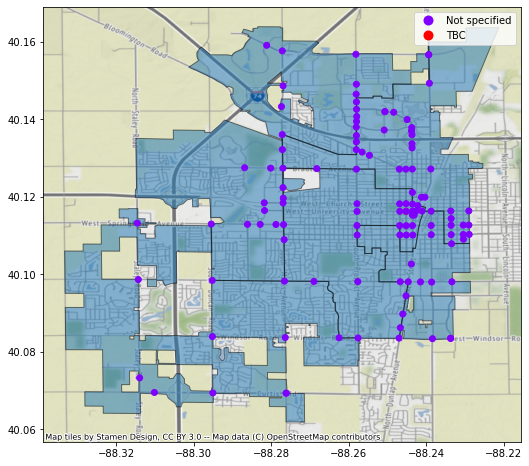

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_tra.plot(column='Coord_Type', ax=ax, cmap='rainbow',categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

In [54]:
import ipywidgets

In [57]:
btype = 'Building'

def my_geopandas_plot(btype):
    gdf_tra_subset = gdf_tra.loc[gdf_tra['Coord_Type']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_tra_subset.plot(column='Coord_Type', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

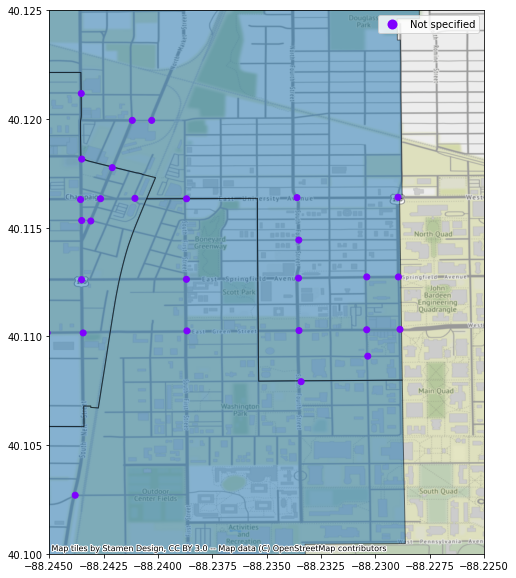

In [58]:
my_geopandas_plot('Not specified')

In [59]:
@ipywidgets.interact(btype=gdf_tra['Coord_Type'].unique())
def my_geopandas_plot(btype):
    gdf_tra_subset = gdf_tra.loc[gdf_tra['Coord_Type']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_tra_subset.plot(column='Coord_Type', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

interactive(children=(Dropdown(description='btype', options=('TBC', 'Not specified'), value='TBC'), Output()),…